In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("server_data.csv", header= None)
X = data.values #Data set
m = len(X) #number of training examples
n = X.shape[1] #number of features
print("Number of Features: ",n)

Number of Features:  11


#### Verifying whether all features are normally distributed

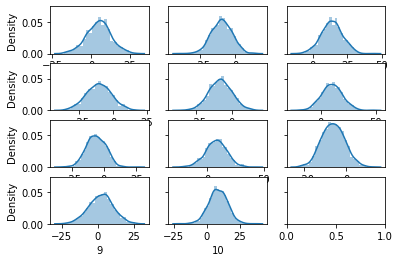

In [4]:
n_rows=4
n_cols=3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, sharey= True)
for i, column in enumerate(data.columns):
    sns.distplot(data[column],ax=axes[i//n_cols,i%n_cols])
    
plt.show()

### Get parameters for Multivariate Gaussian Distribution

$ \mu = {1 \over m} \sum\limits_{i=1}^{n} {x^{(i)}}$

$ \Sigma =  {1 \over m}(x - \mu)(x - \mu)^T  \quad where \ x \ \epsilon \ \mathbb{R}^{n}$

In [5]:
mu = X.mean(axis= 0)
sigma = np.dot((X - mu).transpose(),(X - mu))/m

### Estimate Multivariate Gaussian Probablity Density

#### $P(x; \mu, \Sigma) = {1 \over {(2 \pi)^{n \over 2} |\Sigma|^{1 \over 2}}}\;exp(-{1 \over 2}(x - \mu)^T \Sigma^{-1}(x - \mu))$


In [6]:
def GetProbablity(X, mu, sigma):
    n = X.shape[1]
    prob = np.exp(np.sum(np.dot(X - mu, np.linalg.inv(sigma)) * (X - mu), axis= 1) * (-0.5)) / ((pow(2*np.pi, n/2)*pow(np.linalg.det(sigma),0.5)))
    return prob
    

##### Import Cross Validation Dataset

In [7]:
val = pd.read_csv("server_data_val.csv", header= None)
Xval = val.iloc[:,:-1].values
yval = val.iloc[:,-1].values

##### Estimate Gaussian Probablity Density on Cross Validation Set

In [8]:
prob = GetProbablity(Xval, mu, sigma)

#### Choosing the best threshold ($\epsilon$)

In [9]:
def get_f1_score(prob, yval, epsilon):
    y_predicted = (prob < epsilon).astype(int)
    true_positive = sum(yval & y_predicted)
    precision = true_positive/sum(y_predicted)
    recall = true_positive/sum(yval)
    return 2 * precision * recall / (precision + recall)

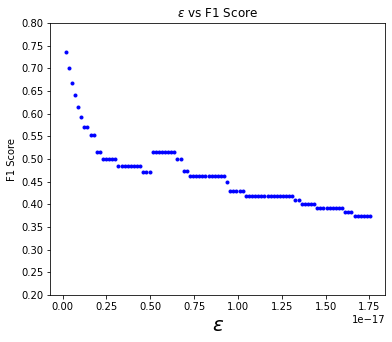

In [10]:
plt.figure(figsize= [6,5])
for epsilon in np.linspace(prob.min(), prob.max()/100, 100):
    f1_score = get_f1_score(prob, yval, epsilon)
    plt.plot(epsilon, f1_score,marker = '.', linestyle = "--", color= "blue")
    
plt.title("$\epsilon$ vs F1 Score")
plt.xlabel("$\epsilon$", fontdict= {"size": 20})
plt.ylabel("F1 Score", fontdict= {"size": 10})
plt.yticks(np.arange(0.2,0.85,0.05))
plt.show()

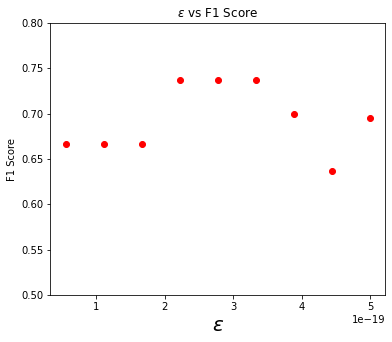

In [11]:
plt.figure(figsize= [6,5])
for epsilon in np.linspace(prob.min(), 0.50e-18, 10):
    f1_score = get_f1_score(prob, yval, epsilon)
    plt.plot(epsilon, f1_score,marker = 'o', linestyle = "--", color= "red")
    
plt.title("$\epsilon$ vs F1 Score")
plt.xlabel("$\epsilon$", fontdict= {"size": 20})
plt.ylabel("F1 Score", fontdict= {"size": 10})
plt.yticks(np.arange(0.5,0.85,0.05))
plt.show()

#### Predition Report for $\epsilon = 3 \times 10^{-19}$

In [ ]:
from sklearn import metrics

In [ ]:
epsilon = 3.0e-19
y_predicted = (prob < epsilon).astype(int)
print("Precision :", np.round(metrics.precision_score(yval, y_predicted),2))
print("Recall    :", metrics.recall_score(yval, y_predicted))
print("Accuracy  :", metrics.accuracy_score(yval, y_predicted))

In [ ]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(yval, y_predicted)).plot(cmap= "Reds")
print(metrics.classification_report(yval, y_predicted))
print("_"*60)
plt.show()